In [1]:
import numpy as np
import urllib.request

In [2]:
urllib.request.urlretrieve("http://www.gutenberg.org/files/6130/6130-0.txt", filename="lliad.txt")
f = open('lliad.txt', 'rb')
lines=[]
for line in f:
    line=line.lower() 
    line=line.decode('ascii', 'ignore') #아스키코드의 범위를 벗어난 특수문자 제거
    if len(line) > 0:
        lines.append(line)
f.close()


In [3]:
lines[:10]

['the project gutenberg ebook of the iliad, by homer\r\n',
 '\r\n',
 'this ebook is for the use of anyone anywhere in the united states and most\r\n',
 'other parts of the world at no cost and with almost no restrictions\r\n',
 'whatsoever.  you may copy it, give it away or re-use it under the terms of\r\n',
 'the project gutenberg license included with this ebook or online at\r\n',
 "www.gutenberg.org.  if you are not located in the united states, you'll have\r\n",
 'to check the laws of the country where you are located before using this ebook.\r\n',
 '\r\n',
 'title: the iliad\r\n']

In [4]:
text=" ".join(lines)
print(len(text)) #글자 개수

1160564


In [8]:
len(sorted(list(set(text))))

60

In [10]:
x.shape #input_shape(batch_shape) : (1, 5, 1)
#(데이터(샘플)개수, 시간차원(time step size), LSTM셀에 입력되는 데이터의(feature) 개수)

(1, 5, 1)

In [9]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM
import numpy as np


x = np.array([[[1.], [2.], [3.], [4.], [5.]]])
y = np.array([[6.]])


xInput = Input(batch_shape=(None, 5, 1))
xLstm = LSTM(3)(xInput)
xOutput = Dense(1)(xLstm)


model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')

print(model.summary())


model.fit(x, y, epochs=50, batch_size=1, verbose=0)
model.predict(x, batch_size=1)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 3)                 60        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None


array([[0.75192267]], dtype=float32)

In [2]:
from keras.datasets import reuters

C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1) or '1ty

In [7]:
(xTrain, yTrain), (xTest, yTest)=reuters.load_data(num_words=1000, test_split=0.2)

In [8]:
print(xTrain[0]) #첫번째 로이터 통신사 뉴스 데이터
print(yTrain[0]) #3 (뉴스 카테고리)
import numpy as np

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [9]:
np.min(yTrain)  #0
np.max(yTrain)  #45
category=np.max(yTrain)+1 #뉴스 카테고리 전체 개수 : 46 개

In [10]:
len(xTrain) #8982개 뉴스 기사(학습)
len(xTest) #2246개 뉴스 기사(테스트)

2246

In [11]:
len(xTrain[8981])

105

In [12]:
from keras.preprocessing import sequence

In [13]:
xTrain=sequence.pad_sequences(xTrain,maxlen=100)
xTest=sequence.pad_sequences(xTest,maxlen=100)

In [14]:
#xTrain[0]

In [15]:
from keras.utils import to_categorical

In [16]:
yTrain=to_categorical(yTrain) # 0 1 2 3 4 5 ...45   0+1=>1(?????????????????????)
yTest=to_categorical(yTest)

In [17]:
yTrain[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
len(xTrain[0])

100

In [19]:
# dtm
#               단어1 ... 단어1000
# 기사1           5   0  0  1  2  
# ...
# 기사11200

In [24]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [25]:
model=Sequential()

In [26]:
from keras.layers import Embedding, LSTM, Dense
model.add(Embedding(1000, 100)) #[001000000...00000] => [0.2 0.5 -0.1 ... 0.7]
#Embedding(불러온 단어의 총 개수, 축소된 차원)
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [31]:
history=model.fit(xTrain, yTrain, batch_size=100, 
          epochs=60, validation_data=(xTest, yTest))

Epoch 1/60
90/90 [==============================] - 8s 92ms/step - loss: 0.2290 - accuracy: 0.9391 - val_loss: 1.8374 - val_accuracy: 0.6946
Epoch 2/60
90/90 [==============================] - 8s 90ms/step - loss: 0.2368 - accuracy: 0.9372 - val_loss: 1.8433 - val_accuracy: 0.6972
Epoch 3/60
90/90 [==============================] - 8s 91ms/step - loss: 0.2446 - accuracy: 0.9367 - val_loss: 1.7663 - val_accuracy: 0.6995
Epoch 4/60
90/90 [==============================] - 8s 93ms/step - loss: 0.2539 - accuracy: 0.9316 - val_loss: 1.7590 - val_accuracy: 0.6981
Epoch 5/60
90/90 [==============================] - 9s 96ms/step - loss: 0.2196 - accuracy: 0.9391 - val_loss: 1.8575 - val_accuracy: 0.6999
Epoch 6/60
90/90 [==============================] - 8s 91ms/step - loss: 0.2014 - accuracy: 0.9448 - val_loss: 1.8600 - val_accuracy: 0.6986
Epoch 7/60
90/90 [==============================] - 8s 91ms/step - loss: 0.2179 - accuracy: 0.9374 - val_loss: 1.8793 - val_accuracy: 0.7026
Epoch 8/60
90

KeyboardInterrupt: 

In [32]:
print(model.evaluate(xTest, yTest))

23/23 [==============================] - 1s 29ms/step - loss: 1.9856 - accuracy: 0.6972
[1.9855974912643433, 0.6972395181655884]


In [33]:
model.save("reuters_model.h5")

NameError: name 'hist' is not defined

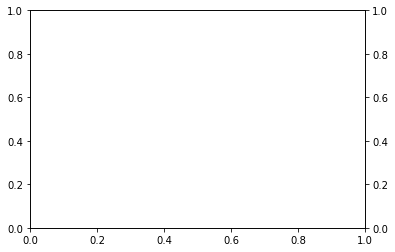

In [34]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()